In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sb

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 

In [7]:
import warnings 
warnings.filterwarnings('ignore')

In [19]:
cal = pd.read_csv('/Users/vidushiagarwal/Downloads/calories.csv') 
exe=pd.read_csv('/Users/vidushiagarwal/Downloads/exercise.csv')
cal.head()
exe.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [20]:
cal.head

<bound method NDFrame.head of         User_ID  Calories
0      14733363     231.0
1      14861698      66.0
2      11179863      26.0
3      16180408      71.0
4      17771927      35.0
...         ...       ...
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

[15000 rows x 2 columns]>

In [21]:
exe.head

<bound method NDFrame.head of         User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]>

In [25]:
final = pd.merge(cal, exe, on='User_ID')

In [26]:
final.head

<bound method NDFrame.head of         User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0      14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1      14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2      11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3      16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4      17771927      35.0  female   27   154.0    58.0      10.0        81.0   
...         ...       ...     ...  ...     ...     ...       ...         ...   
14995  15644082      45.0  female   20   193.0    86.0      11.0        92.0   
14996  17212577      23.0  female   27   165.0    65.0       6.0        85.0   
14997  17271188      75.0  female   43   159.0    58.0      16.0        90.0   
14998  18643037      11.0    male   78   193.0    97.0       2.0        84.0   
14999  11751526      98.0    male   63   173.0    79.0      18.0        92.0   

       Bo

In [27]:
final.shape

(15000, 9)

In [28]:
final.info

<bound method DataFrame.info of         User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0      14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1      14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2      11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3      16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4      17771927      35.0  female   27   154.0    58.0      10.0        81.0   
...         ...       ...     ...  ...     ...     ...       ...         ...   
14995  15644082      45.0  female   20   193.0    86.0      11.0        92.0   
14996  17212577      23.0  female   27   165.0    65.0       6.0        85.0   
14997  17271188      75.0  female   43   159.0    58.0      16.0        90.0   
14998  18643037      11.0    male   78   193.0    97.0       2.0        84.0   
14999  11751526      98.0    male   63   173.0    79.0      18.0        92.0   

       

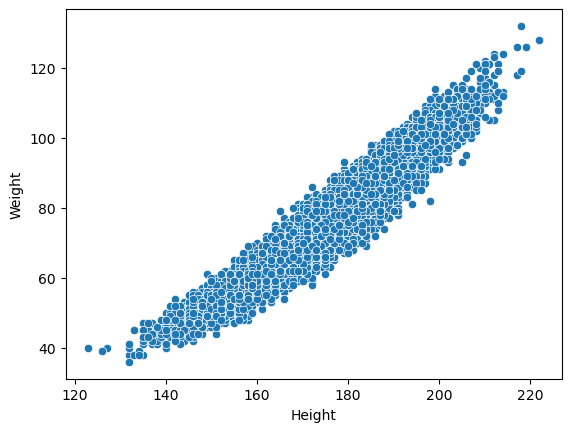

In [30]:
sb.scatterplot(x=final['Height'], y=final['Weight']) 
plt.show()

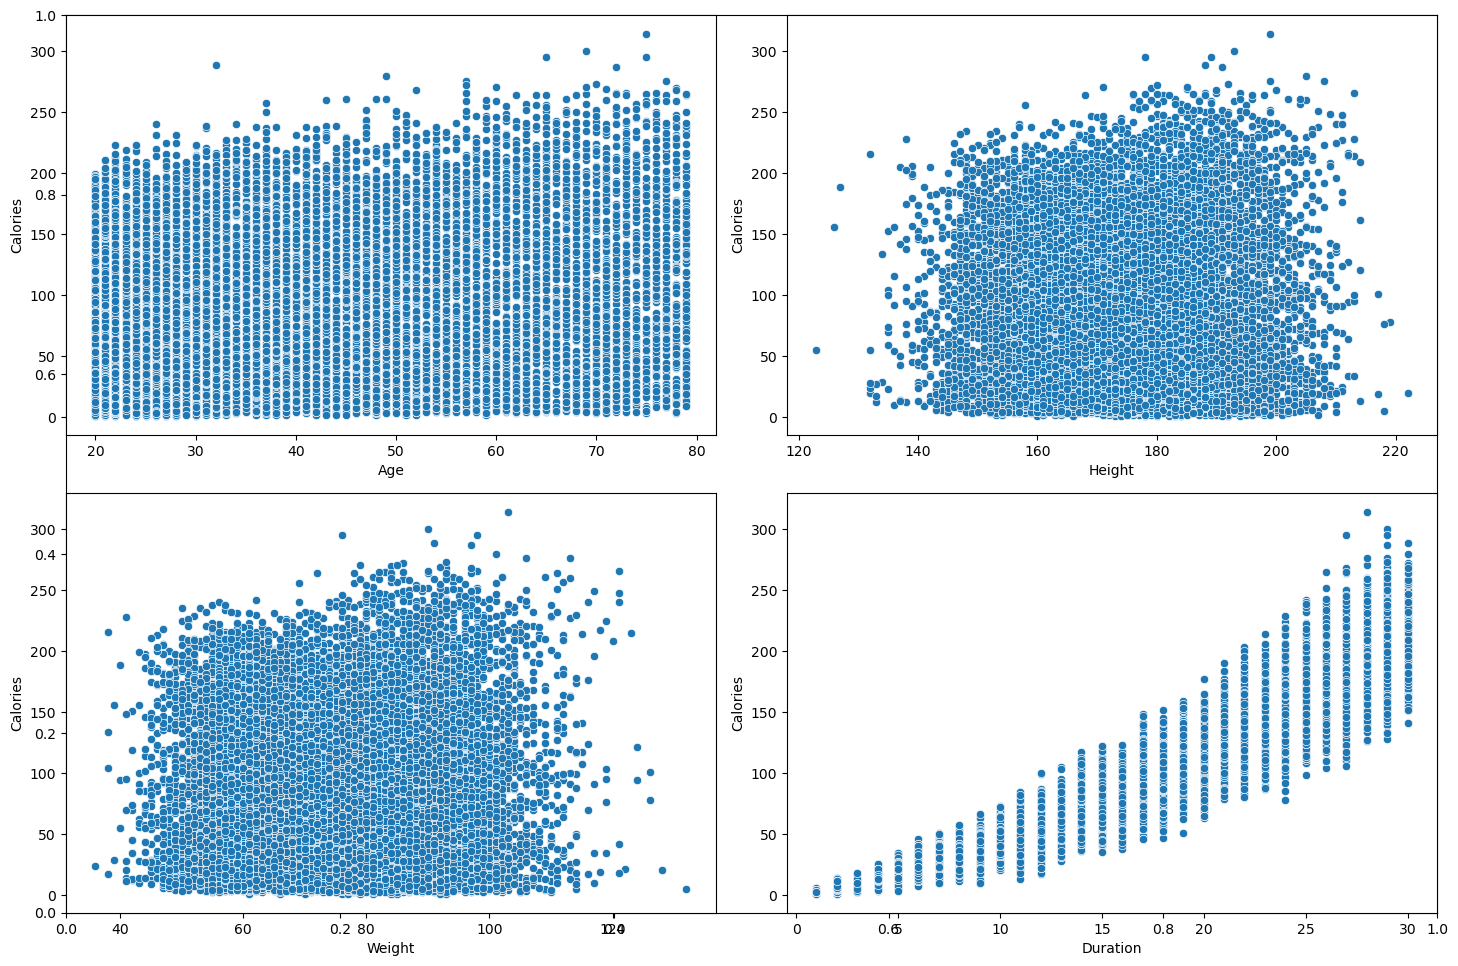

In [65]:
features = ['Age', 'Height', 'Weight', 'Duration'] 
  
plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    x = final.sample(1000) 
    sb.scatterplot( x=final[col], y=final['Calories']) 
plt.tight_layout() 
plt.show() 

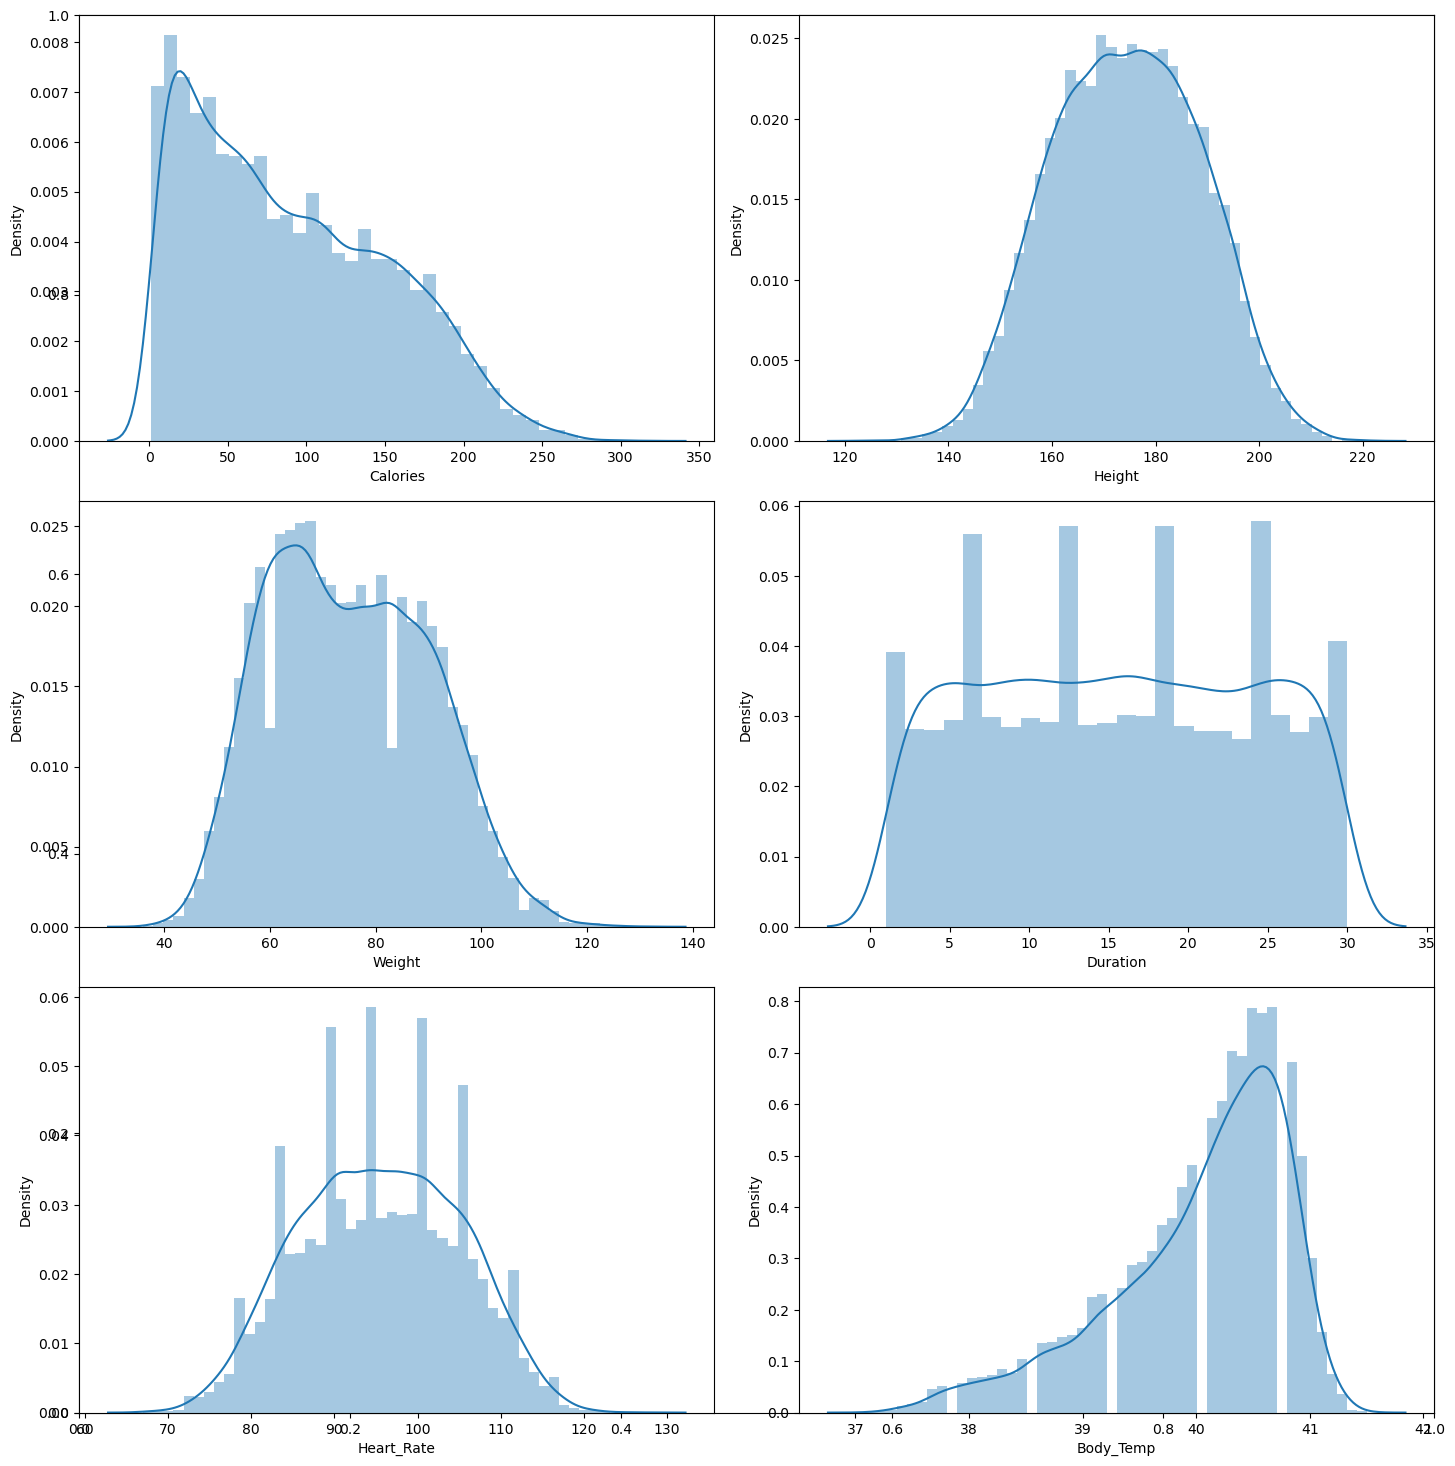

In [68]:
features = final.select_dtypes(include='float').columns 
  
plt.subplots(figsize=(15, 15)) 
for i, col in enumerate(features): 
    plt.subplot(3, 2, i + 1) 
    sb.distplot(final[col]) 
plt.tight_layout() 
plt.show() 

In [69]:
final.replace({'male': 0, 'female': 1}, 
           inplace=True) 
final.head() 

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


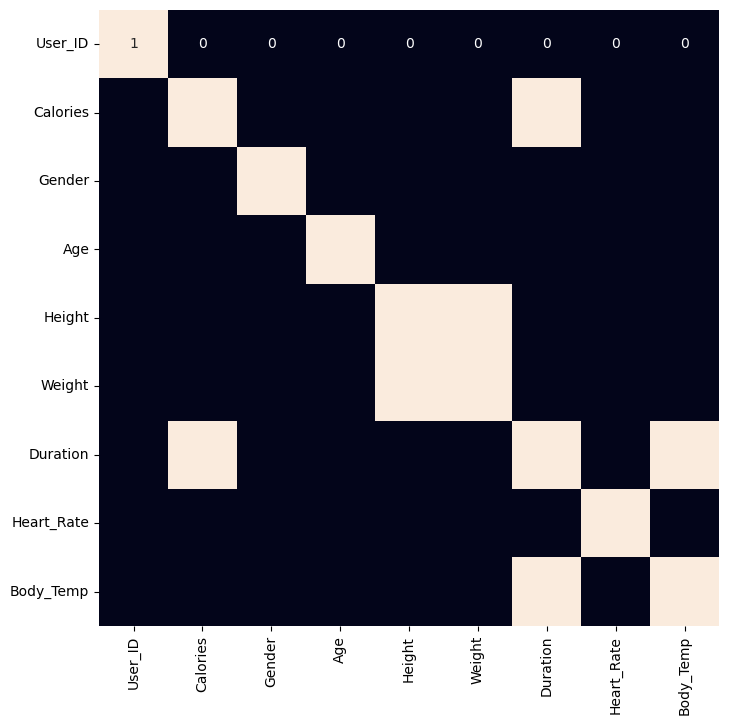

In [70]:
plt.figure(figsize=(8, 8)) 
sb.heatmap(final.corr() > 0.9, 
           annot=True, 
           cbar=False) 
plt.show() 

In [71]:
to_remove = ['Weight', 'Duration'] 
final.drop(to_remove, axis=1, inplace=True) 

In [72]:
final.head

<bound method NDFrame.head of         User_ID  Calories  Gender  Age  Height  Heart_Rate  Body_Temp
0      14733363     231.0       0   68   190.0       105.0       40.8
1      14861698      66.0       1   20   166.0        94.0       40.3
2      11179863      26.0       0   69   179.0        88.0       38.7
3      16180408      71.0       1   34   179.0       100.0       40.5
4      17771927      35.0       1   27   154.0        81.0       39.8
...         ...       ...     ...  ...     ...         ...        ...
14995  15644082      45.0       1   20   193.0        92.0       40.4
14996  17212577      23.0       1   27   165.0        85.0       39.2
14997  17271188      75.0       1   43   159.0        90.0       40.1
14998  18643037      11.0       0   78   193.0        84.0       38.3
14999  11751526      98.0       0   63   173.0        92.0       40.5

[15000 rows x 7 columns]>

In [75]:
features = final.drop(['User_ID', 'Calories'], axis=1)
target = final['Calories'].values

X_train, X_val, Y_train, Y_val = train_test_split(
    features, target, 
    test_size=0.1, 
    random_state=22
)

X_train.shape, X_val.shape


((13500, 5), (1500, 5))

In [76]:
features.head

<bound method NDFrame.head of        Gender  Age  Height  Heart_Rate  Body_Temp
0           0   68   190.0       105.0       40.8
1           1   20   166.0        94.0       40.3
2           0   69   179.0        88.0       38.7
3           1   34   179.0       100.0       40.5
4           1   27   154.0        81.0       39.8
...       ...  ...     ...         ...        ...
14995       1   20   193.0        92.0       40.4
14996       1   27   165.0        85.0       39.2
14997       1   43   159.0        90.0       40.1
14998       0   78   193.0        84.0       38.3
14999       0   63   173.0        92.0       40.5

[15000 rows x 5 columns]>

In [79]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val) 

In [83]:

from sklearn.metrics import mean_absolute_error as mae
models = [
    LinearRegression(),
    Lasso(),
    RandomForestRegressor(),
    Ridge()
]
for model in models:
    model.fit(X_train, Y_train)  

    print(f'{model} :')  

    train_preds = model.predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))  

    val_preds = model.predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() :
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

Lasso() :
Training Error :  17.91508958495804
Validation Error :  17.99503336228866

RandomForestRegressor() :
Training Error :  3.98107226984127
Validation Error :  10.437935492063492

Ridge() :
Training Error :  17.893530494767777
Validation Error :  18.00781790803129

